# Guided Project: Predicting Bike Rentals

We will analyse data from Washington, D.C. communal bike sharing stations where you can rent bicycles by the hour or day. The District collects detailed data on the number of bicycles people rent by the hour and day. Each row represents the number of bike rentals for a single hour of a single day.

In [2]:
import pandas as pd

In [3]:
bike_rentals = pd.read_csv("bike_rental_hour.csv")

In [4]:
bike_rentals.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


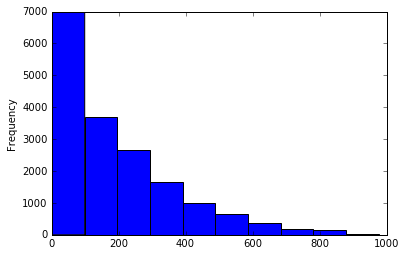

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

bike_rentals['cnt'].plot.hist()
plt.show()

Let us find how the features are correlated to each other

In [6]:
bike_rentals.corr()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


# Segment hours into times of the day

Features can enhance the accuracy of models by introducing new information or distilling existing information. For the hr column contains the hours during which bikes are rented, from 1 to 24. Lets us create a new column with labels for morning, afternoon, evening, and night. Bundling similar times together, enables the model to make better decisions.

In [7]:
def assign_label(hour):
    if hour >= 6 and hour < 12:
        return 1
    elif hour >= 12 and hour < 18:
        return 2
    elif hour >= 18 and hour < 24:
        return 3
    elif hour >= 0 and hour < 6:
        return 4

In [8]:
bike_rentals["time_label"]= bike_rentals['hr'].apply(assign_label)

In [9]:
bike_rentals["time_label"].value_counts()

2    4375
3    4368
1    4360
4    4276
Name: time_label, dtype: int64

Let us split the data into training and testing datasets. To enable us to train an algorithm using the training set, and evaluate its accuracy on the testing set. We will be using sample().

In [11]:
train = bike_rentals.sample(frac=0.8, random_state=1)

In [12]:
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

For our model trainin and testing we wil use linear regression, which will work fairly well on this data, given that many of the columns are highly linearly correlated with the target column 'cnt' and are independent.

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
print(train.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'time_label'],
      dtype='object')


In [24]:
features = ['instant', 'season', 'yr', 'mnth', 'hr', 
            'holiday', 'weekday','workingday', 'weathersit', 
            'temp', 'atemp', 'hum', 'windspeed']

In [25]:
target = 'cnt'

In [26]:
lr = LinearRegression()
lr.fit(train[features], train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
predictions =lr.predict(test[features])

In [33]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(test[target], predictions)
rmse = np.sqrt(mse)
print(mse, rmse)

19580.734550455003 139.93117790705188


conclude on mse ans rmse

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(min_samples_leaf =2, random_state=1)
cross_val_score(dtr,train[features], train[target], cv=10)

array([0.89857355, 0.91885465, 0.92188673, 0.92303655, 0.91723099,
       0.91161171, 0.90790926, 0.91850444, 0.89892173, 0.91161612])

The models accuracy on the feature parameters is high. We need to be careful that it did not overfit.

In [37]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth=2, random_state=0)
rfr.fit(train[features], train[target])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [38]:
predictions = rfr.predict(test[features])
predictions

array([ 25.18965281, 190.18246291, 190.18246291, ..., 345.73669693,
       345.73669693, 345.73669693])

ValueError: x and y must be the same size

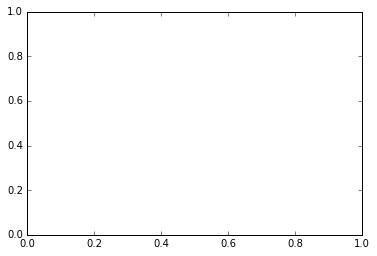

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt

# Scatter plot for original data
plt.scatter(train[features], train[target], color = 'blue') 
 
# plot predicted data
plt.plot(test[target], predictions,
         color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Count')
plt.ylabel('Prediction')
plt.show()
